In [37]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles
from sklearn import svm

In [50]:
X, y = make_gaussian_quantiles(n_classes = 2, n_features = 2, 
                    cov = 2,n_samples = 1500, random_state = 1)

#X2, y2 = make_gaussian_quantiles(mean = (3,3), n_classes = 2, 
#                    n_features = 2, cov = 1.5,
#                    n_samples = 300, random_state = 1)
#X = np.concatenate((X1,X2))
#y = np.concatenate((y1,y2))

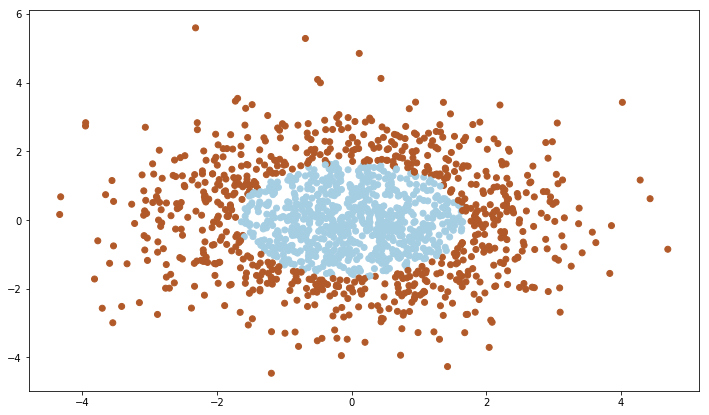

In [51]:
plt.figure(figsize = (12,7))
plt.scatter(X[:,0],X[:,1], c = y, cmap = plt.cm.Paired)
plt.show()

In [52]:
mod = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth = 1),
                                 n_estimators = 300)
mod.fit(X,y);

In [53]:
output = mod.decision_function(X)

In [54]:
output[:50]

array([ 0.0986135 , -0.16610824,  0.38890636, -0.08623684, -0.21187283,
        0.18131086,  0.18325991,  0.12633694,  0.18191795,  0.1578397 ,
       -0.11026104,  0.10058309,  0.38890636, -0.21187283,  0.1693982 ,
        0.39794182, -0.19817417,  0.23675691, -0.21187283, -0.19817417,
       -0.03545434,  0.02304756,  0.02316016, -0.04949293,  0.17403478,
       -0.02520049, -0.15677113,  0.39794182, -0.0479557 ,  0.38890636,
        0.38890636,  0.1419328 , -0.04333766,  0.03327203, -0.0802664 ,
       -0.02384648,  0.08553633,  0.03665986,  0.09260221,  0.19032578,
       -0.17107222, -0.03145207,  0.08553633,  0.38890636, -0.07743472,
       -0.17206563,  0.09260221,  0.39087595,  0.0914972 ,  0.12633694])

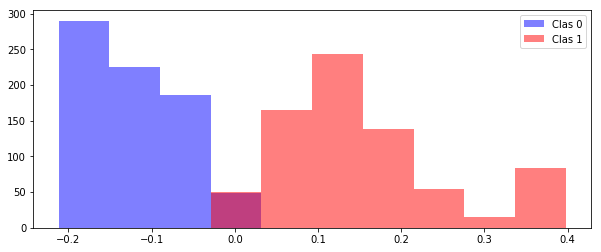

In [55]:
# output = mod.decision_function(X)
plot_range = (output.min(), output.max())

plot_colors = "br"
class_names = "01"
plt.figure(figsize = (10,4))
for label, cl, color in zip(range(2), class_names, plot_colors):
    plt.hist(output[y == label], bins = 10, range = plot_range,
            facecolor = color, label = 'Clas %s' %cl, alpha = 0.5)
plt.legend(loc = 'upper right')
plt.show()

In [58]:
# X.shape

In [57]:
x_min = X[:,0].min()-1
x_max = X[:,0].max()+1
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

x_list = np.arange(x_min, x_max,0.02)
y_list = np.arange(y_min, y_max,0.02)
xx,yy = np.meshgrid(x_list, y_list)
new_grid = np.c_[xx.ravel(), yy.ravel()]

z = mod.predict(new_grid)
z = z.reshape(xx.shape)
np.unique(z)

array([0, 1])

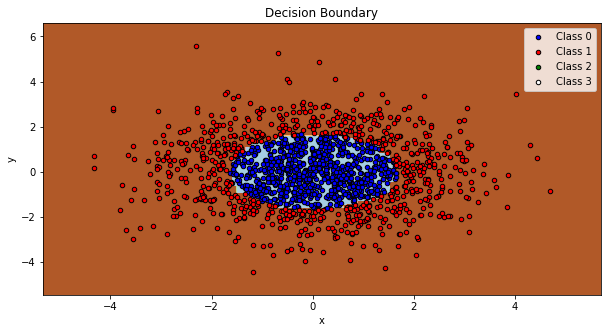

In [59]:
plot_colors = "brgw"
class_names = "0123"
tt = zip(range(4), class_names, plot_colors)

plt.figure(figsize = (10,5))
plt.contourf(xx,yy,z, cmap = plt.cm.Paired)
for label, cl, color in tt:
    idx = np.where(y == label)
    plt.scatter(X[idx,0],X[idx,1], c = color, s=20,
            label = "Class %s" %cl, edgecolor = "k")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc = "upper right")
plt.title("Decision Boundary")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [60]:
mod_linearsvc = svm.LinearSVC(max_iter=10000)
mod_linearsvc.fit(X,y);

In [61]:
x_min = X[:,0].min()-1
x_max = X[:,0].max()+1
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1
x_list = np.arange(x_min, x_max,0.02)
y_list = np.arange(y_min, y_max,0.02)
xx,yy = np.meshgrid(x_list, y_list)
new_grid = np.c_[xx.ravel(), yy.ravel()]
z = mod_linearsvc.predict(new_grid)
z = z.reshape(xx.shape)

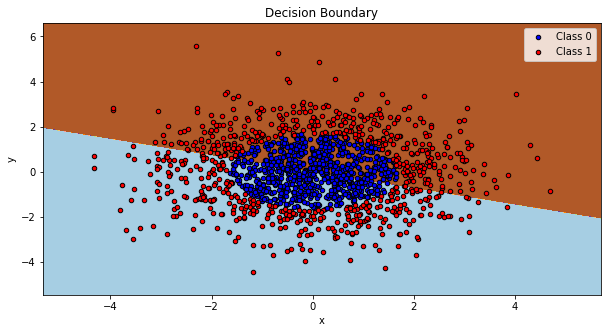

In [62]:
plot_colors = "br"
class_names = "01"
tt = zip(range(2), class_names, plot_colors)
plt.figure(figsize = (10,5))
plt.contourf(xx,yy,z, cmap = plt.cm.Paired)
for label, cl, color in tt:
    idx = np.where(y == label)
    plt.scatter(X[idx,0],X[idx,1], c = color, 
            cmap = plt.cm.copper, s=20,
            label = "Class %s" %cl, edgecolor = "k")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc = "upper right")
plt.title("Decision Boundary")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [63]:
mod_kernel_poly = svm.SVC(kernel = "poly", degree = 6)
mod_kernel_poly.fit(X,y);

In [64]:
x_min = X[:,0].min()-1
x_max = X[:,0].max()+1
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1
x_list = np.arange(x_min, x_max,0.02)
y_list = np.arange(y_min, y_max,0.02)
xx,yy = np.meshgrid(x_list, y_list)
new_grid = np.c_[xx.ravel(), yy.ravel()]
z = mod_kernel_poly.predict(new_grid)
z = z.reshape(xx.shape)

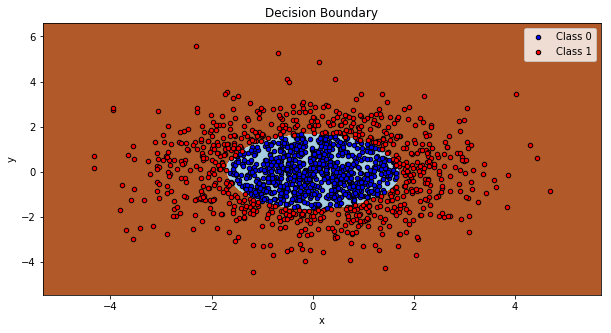

In [65]:
plot_colors = "br"
class_names = "01"
tt = zip(range(2), class_names, plot_colors)
plt.figure(figsize = (10,5))
plt.contourf(xx,yy,z, cmap = plt.cm.Paired)
for label, cl, color in tt:
    idx = np.where(y == label)
    plt.scatter(X[idx,0],X[idx,1], c = color, 
            cmap = plt.cm.copper, s=20,
            label = "Class %s" %cl, edgecolor = "k")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc = "upper right")
plt.title("Decision Boundary")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [66]:
mod_kernel_radial = svm.SVC(kernel = "rbf", C = 1)
mod_kernel_radial.fit(X,y);

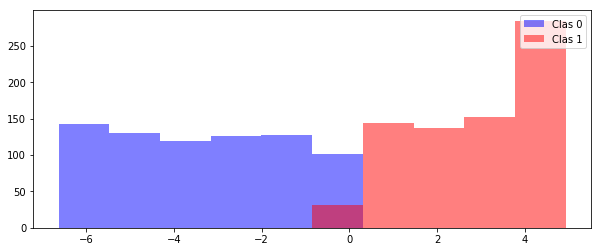

In [67]:
output = mod_kernel_radial.decision_function(X)
plot_range = (output.min(), output.max())

plot_colors = "br"
class_names = "01"
plt.figure(figsize = (10,4))
for label, cl, color in zip(range(2), class_names, plot_colors):
    plt.hist(output[y == label], bins = 10, range = plot_range,
            facecolor = color, label = 'Clas %s' %cl, alpha = 0.5)
plt.legend(loc = 'upper right')
plt.show()

In [68]:
x_min = X[:,0].min()-1
x_max = X[:,0].max()+1
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

x_list = np.arange(x_min, x_max,0.02)
y_list = np.arange(y_min, y_max,0.02)
xx,yy = np.meshgrid(x_list, y_list)
new_grid = np.c_[xx.ravel(), yy.ravel()]
z = mod_kernel_radial.predict(new_grid)
z = z.reshape(xx.shape)

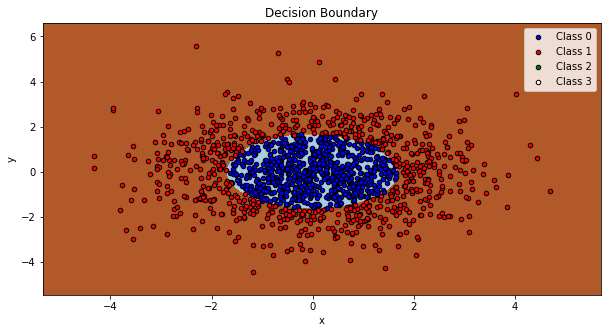

In [69]:
plot_colors = "brgw"
class_names = "0123"
tt = zip(range(4), class_names, plot_colors)

plt.figure(figsize = (10,5))
plt.contourf(xx,yy,z, cmap = plt.cm.Paired)
for label, cl, color in tt:
    idx = np.where(y == label)
    plt.scatter(X[idx,0],X[idx,1], c = color, 
            cmap = plt.cm.copper, s=20,
            label = "Class %s" %cl, edgecolor = "k")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc = "upper right")
plt.title("Decision Boundary")
plt.xlabel("x")
plt.ylabel("y")
plt.show()